In [82]:
from dataclasses import dataclass

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

df=pd.read_csv('https://raw.githubusercontent.com/mwlibrarian/work-in-progress/main/Library_Circulation_Statistics.csv')

#first look at data
df.info()

#renaming columns
df.rename(columns={"Young Adult DVDs" : "Teen DVDs", "Juvenile DVDs" : "Kids DVDs", "Digital Movies" : "Downloaded Movies", "DVDs" : "Adult DVDs"}, inplace = True )
print(df.columns)

#cleaning up misspelled data, consolidating data, and removing data entries before comparing/contrasting data

df.replace(['Litte Creek', 'LIT'], 'Little Creek', inplace = True)
df.replace(['Book Mobile', 'BOO'], 'Bookmobile', inplace = True)
df.replace(['MAIN (SML)', 'Main-Slover', 'Slover'], 'Slover Library', inplace = True)
df.replace(['Downing', 'DOW'], 'H.C. Downing', inplace = True)
df.replace(['BLY'], 'Blyden', inplace = True)
df.replace(['PRE'], 'Pretlow', inplace = True)
df.replace(['JOR'], 'Jordan-Newby', inplace = True)
df.replace(['BLA'], 'B.F. Black', inplace = True)
df.replace(['LAF'], 'Lafayette', inplace = True)
df.replace(['LAR'], 'Larchmont', inplace = True)
df.replace(['PAR'], 'Park Place', inplace = True)
df.replace(['VAN'], 'Van Wyck', inplace = True)
df.replace(['ONLINE*', 'ONLINE'], 'Online', inplace = True)
df.replace(['Febraruay', 'Febuary'], 'February', inplace = True)
df.replace(['JAN', 'Jul', 'BRO', 'Janaf', 'Storage', 'STO', 'TUC'], 'Dummy data', inplace = True)

#drops unwanted data
df.drop(df[df['Location'] == 'Dummy data'].index, inplace=True)

#drops duplicates but keeps the first one that is found
df.drop_duplicates(keep = 'first', inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              1564 non-null   int64  
 1   Month             1564 non-null   object 
 2   Location          1564 non-null   object 
 3   Young Adult DVDs  1536 non-null   float64
 4   Juvenile DVDs     1536 non-null   float64
 5   Digital Movies    1172 non-null   float64
 6   DVDs              1536 non-null   float64
 7   Rated R DVDs      1536 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 97.9+ KB
Index(['Year', 'Month', 'Location', 'Teen DVDs', 'Kids DVDs',
       'Downloaded Movies', 'Adult DVDs', 'Rated R DVDs'],
      dtype='object')


In [83]:
#replacing na values in Rated R DVDs with 0
df['Teen DVDs'].fillna( 0, inplace = True)
df['Kids DVDs'].fillna( 0, inplace = True)
df['Downloaded Movies'].fillna( 0, inplace = True)
df['Adult DVDs'].fillna( 0, inplace = True)
df['Rated R DVDs'].fillna( 0, inplace = True)

#converting from float to int
df['Teen DVDs'] = df['Teen DVDs'].apply(np.int64)
df['Kids DVDs'] = df['Kids DVDs'].apply(np.int64)
df['Downloaded Movies']= df['Downloaded Movies'].apply(np.int64)
df['Adult DVDs']= df['Adult DVDs'].apply(np.int64)
df['Rated R DVDs']= df['Rated R DVDs'].apply(np.int64)

#displaying the datatypes
display(df.dtypes)

#Used to see everything
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

#sorting
df.sort_values(by = ['Location', 'Year', 'Month'], axis = 0, ascending = True, inplace=True)

#reset the index to group by 'Location'
df.reset_index(drop=True, inplace=True)

Year                  int64
Month                object
Location             object
Teen DVDs             int64
Kids DVDs             int64
Downloaded Movies     int64
Adult DVDs            int64
Rated R DVDs          int64
dtype: object

In [84]:
#creating a new df for one location and working only with that data
df_subset = df[['Year', 'Month', 'Location', 'Teen DVDs', 'Kids DVDs', 'Downloaded Movies', 'Adult DVDs', 'Rated R DVDs']]
location_bfblack = df_subset[df['Location'] == 'B.F. Black']

L_bfblack_teen_years = location_bfblack.groupby('Year')['Teen DVDs']
L_bfblack_kids_years = location_bfblack.groupby('Year')['Kids DVDs']
L_bfblack_downloaded_years = location_bfblack.groupby('Year')['Downloaded Movies']
L_bfblack_adult_years = location_bfblack.groupby('Year')['Adult DVDs']
L_bfblack_ratedr_years = location_bfblack.groupby('Year')['Rated R DVDs']

#Creating mean and median data per location by item type ('Teen DVDs', 'Kids DVDs', 'Downloaded Movies', 'Adult DVDs', 'Rated R DVDs') 
aggsT = L_bfblack_teen_years.agg([np.mean, np.median])
aggsK = L_bfblack_kids_years.agg([np.mean, np.median])
aggsD = L_bfblack_downloaded_years.agg([np.mean, np.median])
aggsA = L_bfblack_adult_years.agg([np.mean, np.median])
aggsR = L_bfblack_ratedr_years.agg([np.mean, np.median])

#creating data by location for a specific year
bfblack_2017 = location_bfblack[df['Year'] == 2017]

aggs_year = bfblack_2017.agg([np.mean, np.median])
print(aggs_year)

print(bfblack_2017['Teen DVDs'].mode)

#creating sum totals by item type for specified location and year 
#*** Note that the Year column entries are not useful as they are just the sum of the years in integers within year column
year_totals = location_bfblack.groupby([df['Year']])
print(year_totals.sum())


          Year  Teen DVDs  Kids DVDs  Downloaded Movies  Adult DVDs  \
mean    2017.0       0.25        0.0                0.0       296.5   
median  2017.0       0.00        0.0                0.0       286.5   

        Rated R DVDs  
mean           139.5  
median         138.0  
<bound method Series.mode of 0     0
1     0
2     0
3     1
4     2
5     0
6     0
7     0
8     0
9     0
10    0
11    0
Name: Teen DVDs, dtype: int64>
       Year  Teen DVDs  Kids DVDs  Downloaded Movies  Adult DVDs  Rated R DVDs
Year                                                                          
2017  24204          3          0                  0        3558          1674
2018  24216          2          0                  0        4779          1790
2019  24228          1          0                  0        6311          2354
2020  24240          0          0                  0         733           219
2021  24252          0          0                  0         547           221
2022   6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


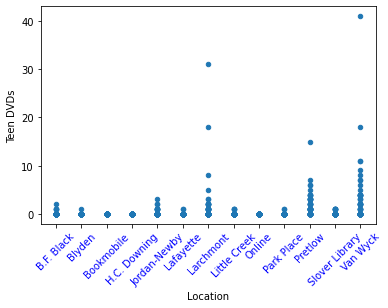

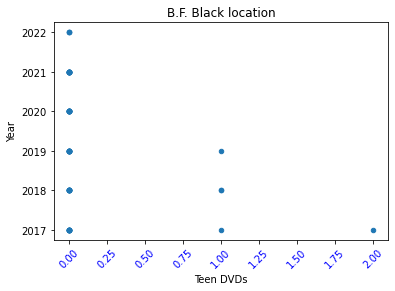

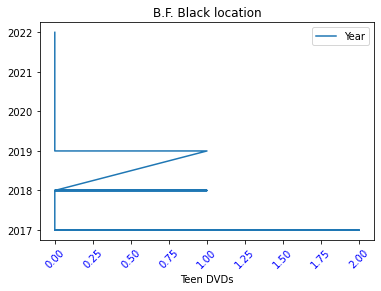

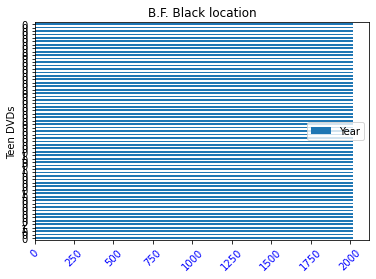

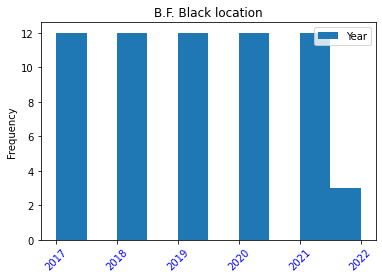

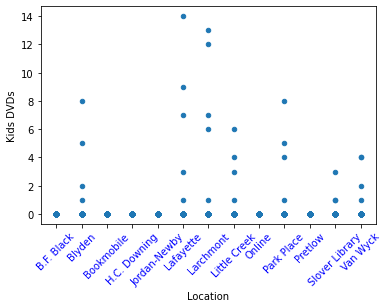

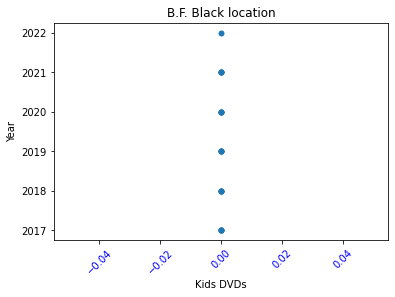

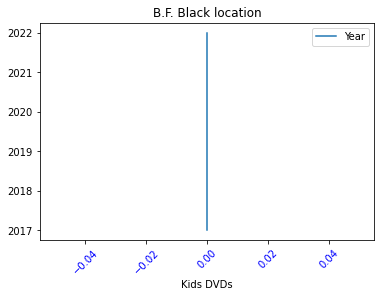

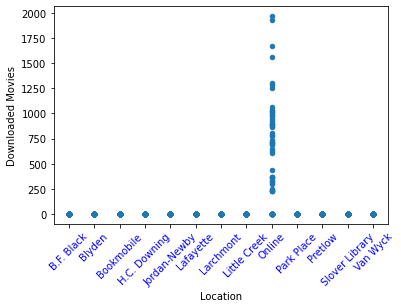

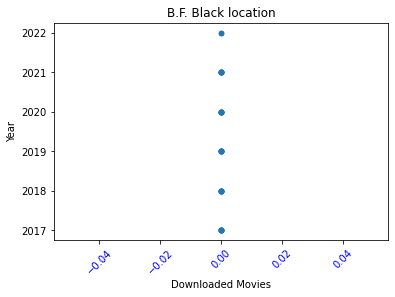

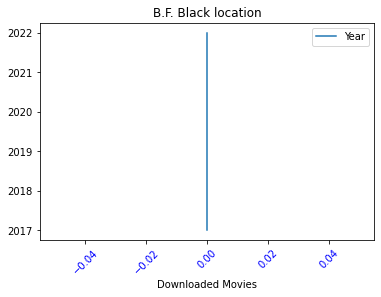

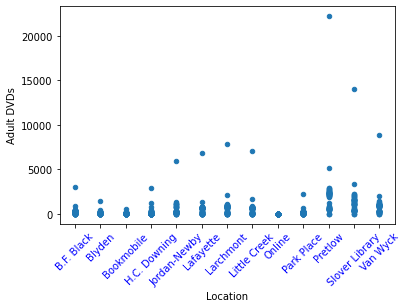

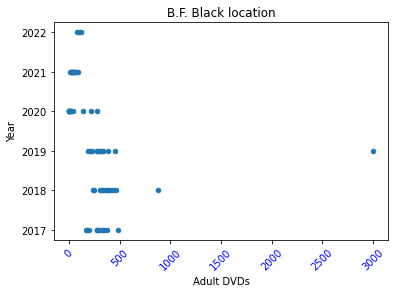

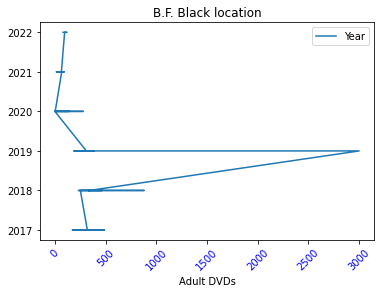

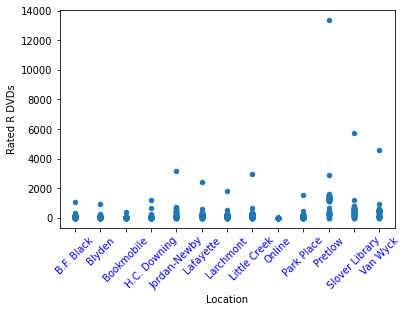

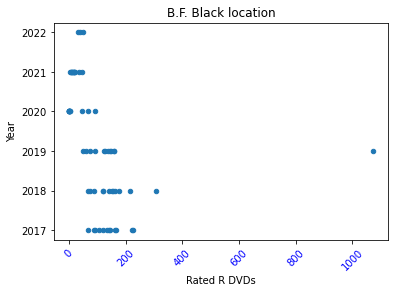

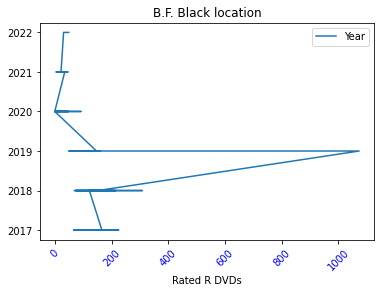

In [85]:
#Creation of graphs per item type ('Teen DVDs', 'Kids DVDs', 'Downloaded Movies', 'Adult DVDs', 'Rated R DVDs') and location
#Teen
df.plot(x='Location', y = 'Teen DVDs', kind='scatter')
plt.xticks(fontsize=10, color='b', rotation=45)
plt.show()

location_bfblack.plot(x='Teen DVDs', y = 'Year', kind='scatter')
plt.xticks(fontsize=10, color='b', rotation=45)
plt.title('B.F. Black location')
plt.show()

location_bfblack.plot(x='Teen DVDs', y = 'Year', kind='line')
plt.xticks(fontsize=10, color='b', rotation=45)
plt.title('B.F. Black location')
plt.show()

#the next two graphs do not work well for my data, so I will not use them for other locations
location_bfblack.plot(x='Teen DVDs', y = 'Year', kind='barh')
plt.xticks(fontsize=10, color='b', rotation=45)
plt.title('B.F. Black location')
plt.show()

location_bfblack.plot(x='Teen DVDs', y = 'Year', kind='hist')
plt.xticks(fontsize=10, color='b', rotation=45)
plt.title('B.F. Black location')
plt.show()

#Kids
df.plot(x='Location', y = 'Kids DVDs', kind='scatter')
plt.xticks(fontsize=10, color='b', rotation=45)
plt.show()

location_bfblack.plot(x='Kids DVDs', y = 'Year', kind='scatter')
plt.xticks(fontsize=10, color='b', rotation=45)
plt.title('B.F. Black location')
plt.show()

location_bfblack.plot(x='Kids DVDs', y = 'Year', kind='line')
plt.xticks(fontsize=10, color='b', rotation=45)
plt.title('B.F. Black location')
plt.show()

#Downloaded
df.plot(x='Location', y = 'Downloaded Movies', kind='scatter')
plt.xticks(fontsize=10, color='b', rotation=45)
plt.show()

location_bfblack.plot(x='Downloaded Movies', y = 'Year', kind='scatter')
plt.xticks(fontsize=10, color='b', rotation=45)
plt.title('B.F. Black location')
plt.show()

location_bfblack.plot(x='Downloaded Movies', y = 'Year', kind='line')
plt.xticks(fontsize=10, color='b', rotation=45)
plt.title('B.F. Black location')
plt.show()

#Adult
df.plot(x='Location', y = 'Adult DVDs', kind='scatter')
plt.xticks(fontsize=10, color='b', rotation=45)
plt.show()

location_bfblack.plot(x='Adult DVDs', y = 'Year', kind='scatter')
plt.xticks(fontsize=10, color='b', rotation=45)
plt.title('B.F. Black location')
plt.show()

location_bfblack.plot(x='Adult DVDs', y = 'Year', kind='line')
plt.xticks(fontsize=10, color='b', rotation=45)
plt.title('B.F. Black location')
plt.show()

#Rated R
df.plot(x='Location', y = 'Rated R DVDs', kind='scatter')
plt.xticks(fontsize=10, color='b', rotation=45)
plt.show()

location_bfblack.plot(x='Rated R DVDs', y = 'Year', kind='scatter')
plt.xticks(fontsize=10, color='b', rotation=45)
plt.title('B.F. Black location')
plt.show()

location_bfblack.plot(x='Rated R DVDs', y = 'Year', kind='line')
plt.xticks(fontsize=10, color='b', rotation=45)
plt.title('B.F. Black location')
plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


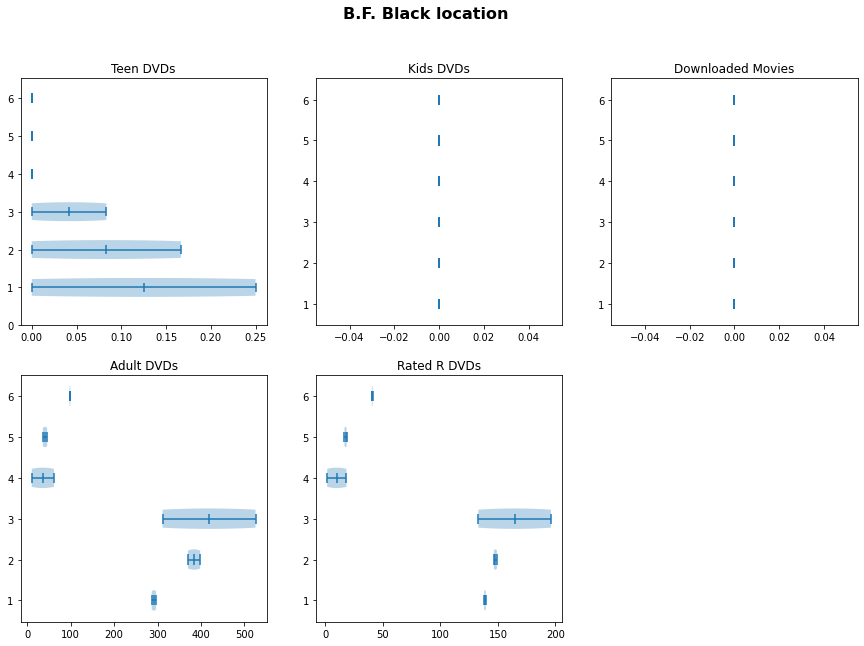

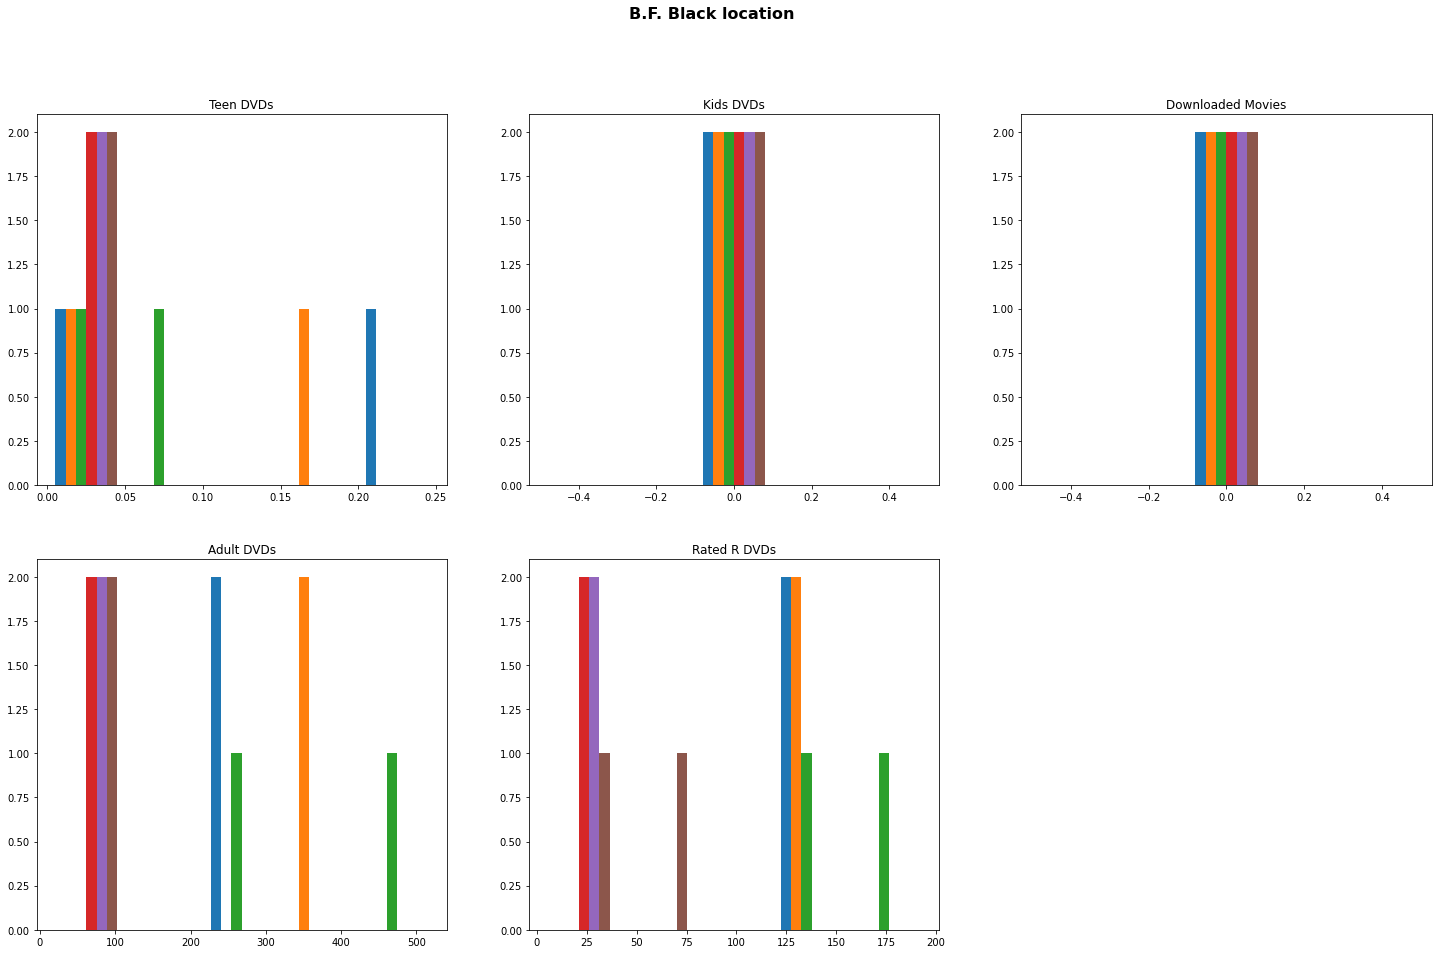

In [86]:

#some other ways to plot data for a given location using aggregates of mean and median, decided not to pursue these for all locations
#Creates figure and multiple plots for Violin plot
fig, ax = plt.subplots(2,3, figsize=(15,10))


ax[0,0].violinplot(aggsT, showmedians=True, vert=False)
ax[0,0].set_title(('Teen DVDs'), loc = 'center') 
#not sure why this would not work to label the y axis tick marks by their datapoints versus just numerically from 1 to 6?
ax[0,0].set_yticks(np.arange(6), ('2017', '2018', '2019', '2020', '2021', '2022'))

ax[0,1].violinplot(aggsK, showmedians=True, vert=False)
ax[0,1].set_title(('Kids DVDs'), loc = 'center')

ax[0,2].violinplot(aggsD, showmedians=True, vert=False)
ax[0,2].set_title(('Downloaded Movies'), loc = 'center')

ax[1,0].violinplot(aggsA, showmedians=True, vert=False)
ax[1,0].set_title(('Adult DVDs'), loc = 'center')

ax[1,1].violinplot(aggsR, showmedians=True, vert=False)
ax[1,1].set_title(('Rated R DVDs'), loc = 'center')

# Removes empty plot
fig.delaxes(ax[1,2])

plt.suptitle('B.F. Black location', fontweight='bold', fontsize=16 )
plt.show()

#Creates figure and multiple plots for Histogram plots, did not work well for my data

fig, ax = plt.subplots(2,3,figsize=(25,15))

ax[0,0].hist(aggsT, bins=5)
ax[0,0].set_title(('Teen DVDs'), loc = 'center')
ax[0,1].hist(aggsK, bins=5)
ax[0,1].set_title(('Kids DVDs'), loc = 'center')
ax[0,2].hist(aggsD, bins=5)
ax[0,2].set_title(('Downloaded Movies'), loc = 'center')
ax[1,0].hist(aggsA, bins=5)
ax[1,0].set_title(('Adult DVDs'), loc = 'center')
ax[1,1].hist(aggsR, bins=5)
ax[1,1].set_title(('Rated R DVDs'), loc = 'center')

fig.delaxes(ax[1,2])

plt.suptitle('B.F. Black location', fontweight='bold', fontsize=16 )
plt.show()

In [87]:
#experimenting with configuring data from original dataframe
location_bfblack = df_subset[df['Location'] == 'B.F. Black']

L_bfblack_teen_years = location_bfblack.groupby('Year')['Teen DVDs']
L_bfblack_kids_years = location_bfblack.groupby('Year')['Kids DVDs']
L_bfblack_downloaded_years = location_bfblack.groupby('Year')['Downloaded Movies']
L_bfblack_adult_years = location_bfblack.groupby('Year')['Adult DVDs']
L_bfblack_ratedr_years = location_bfblack.groupby('Year')['Rated R DVDs']


location_blyden = df_subset[df['Location'] == 'Blyden']
location_bookmobile = df_subset[df['Location'] == 'Bookmobile']
location_hcdowning = df_subset[df['Location'] == 'H.C. Downing']
location_jordannewby = df_subset[df['Location'] == 'Jordan-Newby']
location_lafayette = df_subset[df['Location'] == 'Lafayette']
location_larchmont = df_subset[df['Location'] == 'Larchmont']
location_littlecreek = df_subset[df['Location'] == 'Little Creek']
location_sloverlibrary = df_subset[df['Location'] == 'Slover Library']
location_online = df_subset[df['Location'] == 'Online']
location_parkplace = df_subset[df['Location'] == 'Park Place']
location_pretlow = df_subset[df['Location'] == 'Pretlow']
location_vanwyck = df_subset[df['Location'] == 'Van Wyck']

In [88]:
#work to sum all the item types together for each row (which are delintated by year and month) by adding amounts under each column then sorting by year and location
df_subset = df[['Year', 'Month', 'Location', 'Teen DVDs', 'Kids DVDs', 'Downloaded Movies', 'Adult DVDs', 'Rated R DVDs']]
df_subset2 = df[['Year', 'Month', 'Location']]
List_items = df[['Teen DVDs', 'Kids DVDs', 'Downloaded Movies', 'Adult DVDs', 'Rated R DVDs']]

List_items.sum(axis=1)
item_totals=List_items.sum(axis=1)
Needed_items = pd.concat([df_subset2, item_totals], axis=1) 
Needed_items.sort_values(by = ['Location', 'Year'], axis = 0, ascending = True, inplace=True)

Needed_items.rename(columns={ 0 :'Total-all DVDs & Downloadable Movies'}, inplace = True)

print(Needed_items.columns)


Index(['Year', 'Month', 'Location', 'Total-all DVDs & Downloadable Movies'], dtype='object')


                Total-all DVDs & Downloadable Movies
Location                                            
B.F. Black                                     22610
Blyden                                         13077
Bookmobile                                      7117
H.C. Downing                                   14083
Jordan-Newby                                   42526
Lafayette                                      47194
Larchmont                                      53575
Little Creek                                   48848
Online                                         37200
Park Place                                     18826
Pretlow                                       197309
Slover Library                                111611
Van Wyck                                       77567
Index(['B.F. Black', 'Blyden', 'Bookmobile', 'H.C. Downing', 'Jordan-Newby',
       'Lafayette', 'Larchmont', 'Little Creek', 'Online', 'Park Place',
       'Pretlow', 'Slover Library', 'Van Wyck'],
      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  from ipykernel import kernelapp as app


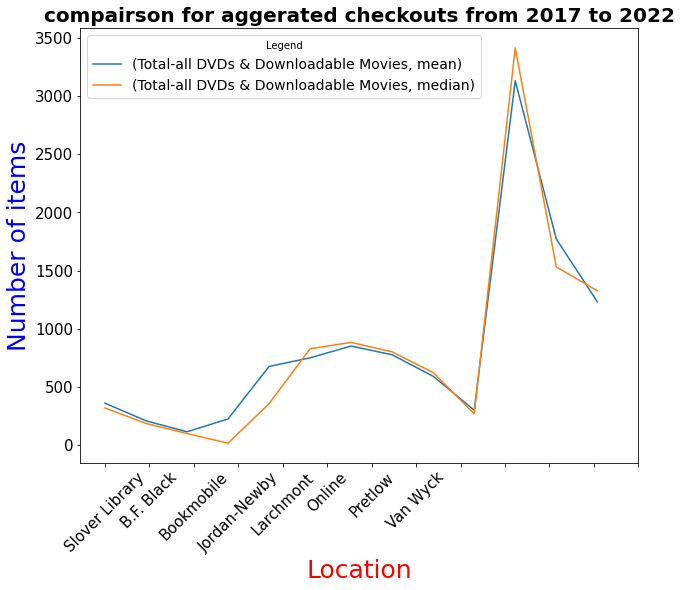

In [89]:
Needed_items.pop('Year')
allyears_totals_grouped = Needed_items.groupby('Location')
print(allyears_totals_grouped.sum())
allyears_final =allyears_totals_grouped.agg([np.mean, np.median])
print(allyears_final.index)
print(allyears_final)

#my final graph

allyears_final.plot(figsize=(10,8))
plt.legend(prop={'size':14}, fontsize='small', title='Legend', loc='upper left')
plt.title('compairson for aggerated checkouts from 2017 to 2022', fontweight='bold', fontsize=20)
plt.xticks((np.linspace(0,13, num=13)), label="Location", fontsize=15, rotation=45)
plt.xlabel('Location', color='red', fontsize=25)
plt.axis(tight=True)
plt.yticks(label="Number of items", fontsize=15)
plt.ylabel('Number of items', color='blue', fontsize=25)

plt.show()

